In [ ]:
"""
Day 1
Jack and I figured out a platform where we can use realtime collaboration to simultaneously work on our Python code. It's a pretty epic combination between Jupyter Notebooka and Google Docs TBH
"""

"\nDay 1\nJack and I figured out a platform where we can use realtime collaboration to simultaneously work on our Python code. It's a pretty epic combination between Jupyter Notebooka and Google Docs TBH\n"

In [ ]:
#GAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

temps = pd.read_csv('yearly_global_temp.csv')
temps

In [ ]:
x = np.linspace(1850, 2018, 168).reshape(-1, 1)
y = temps['Value'][0:168].to_numpy()
print(np.size(x), np.size(y))

168 168


In [ ]:
y

array([-0.52, -0.65, -0.55, -0.58, -0.26, -0.51, -0.8 , -0.43, -0.44,
       -0.15, -0.75, -0.25, -0.52, -0.26, -0.32, -0.64, -0.46, -0.65,
       -0.32, -0.5 , -0.28, -0.11, -0.48, -0.39, -0.48, -0.51, -0.27,
       -0.11,  0.26, -0.25, -0.5 , -0.48, -0.2 , -0.43, -0.75, -0.45,
       -0.53, -0.39, -0.74, -0.09, -0.21, -0.39, -0.58, -0.42,  0.1 ,
       -0.54, -0.56, -0.7 , -1.1 , -0.55, -0.08,  0.21, -0.47,  0.05,
       -0.6 , -0.72, -0.31, -0.34, -0.8 , -0.75, -0.56, -0.83, -0.77,
       -0.49, -0.19, -0.2 , -0.5 , -1.03, -0.37, -0.51,  0.05, -0.17,
       -0.08, -0.39,  0.01, -0.23,  0.53, -0.61, -0.29, -0.3 ,  0.21,
       -0.13, -0.18, -0.36, -0.35,  0.13, -0.3 , -0.46,  0.38, -0.28,
        0.06, -0.16, -0.17, -0.04,  0.36, -0.05,  0.  ,  0.32, -0.3 ,
        0.24, -0.02, -0.23, -0.34,  0.33, -0.3 , -0.66, -0.27, -0.37,
        0.03,  0.49, -0.91,  0.08,  0.36, -0.44, -0.36, -0.15, -0.15,
        0.19,  0.8 , -0.29, -0.03, -0.07,  0.13,  0.61,  0.18,  0.32,
       -0.28,  0.29,

(array([1825., 1850., 1875., 1900., 1925., 1950., 1975., 2000., 2025.,
        2050.]),
 [Text(1825.0, 0, '1825'),
  Text(1850.0, 0, '1850'),
  Text(1875.0, 0, '1875'),
  Text(1900.0, 0, '1900'),
  Text(1925.0, 0, '1925'),
  Text(1950.0, 0, '1950'),
  Text(1975.0, 0, '1975'),
  Text(2000.0, 0, '2000'),
  Text(2025.0, 0, '2025'),
  Text(2050.0, 0, '2050')])

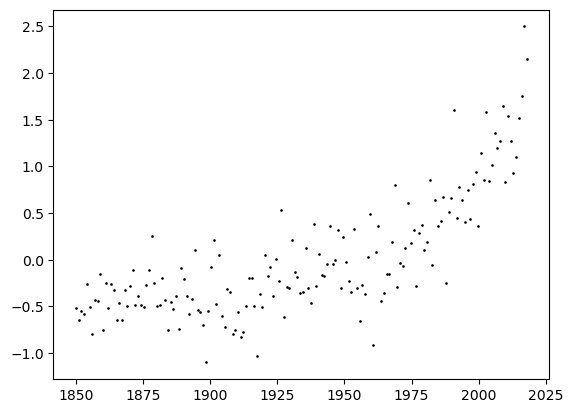

In [ ]:
plt.scatter(x, y, c='k', s = 0.8)
plt.xticks()

In [ ]:
'''from sklearn.gaussian_process.kernels import RBF

long_term_trend_kernel = 50.0**2 * RBF(length_scale=50.0)'''

'from sklearn.gaussian_process.kernels import RBF\n\nlong_term_trend_kernel = 50.0**2 * RBF(length_scale=50.0)'

In [ ]:
from sklearn.gaussian_process.kernels import RBF

long_term_trend_kernel = 10.0**2 * RBF(length_scale=10.0)

In [ ]:
'''from sklearn.gaussian_process.kernels import ExpSineSquared
sub_kernel = (
    2.0**2
    * RBF(length_scale=100.0)
    * ExpSineSquared(length_scale=15.0, periodicity=15.0)
)'''

'from sklearn.gaussian_process.kernels import ExpSineSquared\nsub_kernel = (\n    2.0**2\n    * RBF(length_scale=100.0)\n    * ExpSineSquared(length_scale=15.0, periodicity=15.0)\n)'

In [ ]:
from sklearn.gaussian_process.kernels import RationalQuadratic

irregularities_kernel = 0.5**2 * RationalQuadratic(length_scale=1.0, alpha=1.0)

In [ ]:
from sklearn.gaussian_process.kernels import WhiteKernel

noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
    noise_level=0.1**2, noise_level_bounds=(1e-5, 1e5)
)

In [ ]:
main_kernel = (
    long_term_trend_kernel + irregularities_kernel + noise_kernel
)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

y_mean = y.mean()
gaussian_process = GaussianProcessRegressor(kernel=main_kernel, normalize_y=False)
gaussian_process.fit(x, y - y_mean)

GaussianProcessRegressor(kernel=10**2 * RBF(length_scale=10) + 0.5**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01)) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. GaussianProcessRegressor GaussianProcessRegressor(kernel=10**2 * RBF(length_scale=10) + 0.5**2 * RationalQuadratic(alpha=1, length_scale=1) + 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.01))

In [ ]:
import datetime
import numpy as np

X_test = np.linspace(start=1850, stop=2023, num=168).reshape(-1, 1)
sunnum_pred, std_sunnum_pred = gaussian_process.predict(X_test, return_std=True)

Text(0, 0.5, 'Temperature Anomoly (Celsius)')

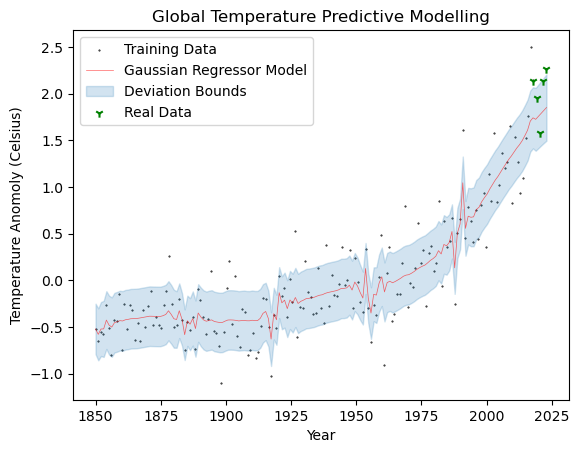

In [ ]:
plt.scatter(x, y, color="black", s=0.2, label="Training Data")
plt.plot(X_test, sunnum_pred + y_mean, color="red", alpha=0.6, label="Gaussian Regressor Model", linewidth = 0.5)
plt.fill_between(
    X_test.ravel(),
    sunnum_pred - std_sunnum_pred + y_mean,
    sunnum_pred + std_sunnum_pred + y_mean, 
    color="tab:blue",
    alpha=0.2,
    label = "Deviation Bounds"
)
plt.scatter(np.linspace(2018, 2023, 5), temps["Value"][169:], c = 'green', label = "Real Data", marker = "1")
plt.legend()
plt.title("Global Temperature Predictive Modelling")
plt.xlabel("Year")
plt.ylabel("Temperature Anomoly (Celsius)")

array([2012., 2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,
       2021., 2022., 2023.])